In [ ]:
!pip install transformers
!pip install sastrawi

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/ganjar1000.csv', sep=',')

In [ ]:
df = df.dropna()
df

,full_text,text_clean,class
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",temu airlangga tutup temu magnet temu temu kal...,2
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",sepi berita airlangga hartarto temu publik med...,0
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,hebat kali udel ganti coblos yohanis yamani jo...,2
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",wapres,0
4,1 Muharam bersama GANJAR https://t.co/NzIDJZ0AkV,muharam,1
...,...,...,...
989,Masih tentang Haru Biru kepulangan Haji Anies ...,haru biru pulang haji makkah beda sambut haji ...,1
990,Ganjar Pranowo adalah sosok yg sederhana dan m...,sosok sederhana rakyat,2
991,"Adian sebut, Presiden Jokowi bilang ke dirinya...",adi presiden bilang dukung,1
992,@ch_chotimah2 @ganjarpranowo Kalau dia hebat.....,hebat suruh atur daerah hukum mati koroptor du...,2


In [ ]:
df_class = df['class']
df = df.drop(['full_text', 'class'], axis=1)
df

,text_clean
0,temu airlangga tutup temu magnet temu temu kal...
1,sepi berita airlangga hartarto temu publik med...
2,hebat kali udel ganti coblos yohanis yamani jo...
3,wapres
4,muharam
...,...
989,haru biru pulang haji makkah beda sambut haji ...
990,sosok sederhana rakyat
991,adi presiden bilang dukung
992,hebat suruh atur daerah hukum mati koroptor du...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text_clean  994 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

In [ ]:
kata_baku = pd.read_csv('https://drive.google.com/uc?id=1-4tVP2_bGtV1K1StQgavSIUokfSfvOv5')
kata_baku = kata_baku.set_index("kataAlay")["kataBaik"].to_dict()

# #dengan stopword 300
# stop_words = list(pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/stopwords300.txt', header=None)[0])
#dengan stopword 300 nama
stop_words = list(pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/stopwords300Nama.txt', header=None)[0])
# #dengan stopword 700
# stop_words = list(pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/stopwords700.txt', header=None)[0])
# #dengan stopword 700 nama
# stop_words = list(pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/stopwords700Nama.txt', header=None)[0])

In [ ]:
def cleaning(text):
    text = str(text)
    # print("Text awal :\n\n", text)

    # Mengubah setiap kata menjadi lowercase
    text =  text.lower()

    # Menghapus Link Dengan Pattern http/https dan www
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(@\w+|#\w+)', '', text)

    # Menghapus Tag HTML
    text = re.sub('<.*?>', '', text)

    # Menghapus Tanda Baca Seperti Titik Dan Koma
    # text = text.translate(str.maketrans(' ', ' ', string.punctuation))

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Mengganti baris baru (enter) dengan spasi
    text = re.sub("\n", " ", text)

    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub('(s{2,})', ' ', text)

    # print("\nHasil Prerocessing :", text)

    # Menghapus kata yang mengandung judul topik dan kata yang terdapat pada stopwords indonesia
    temp_text_split = []
    final_text = []
    text_split = text.split(' ')

    for i in range(len(text_split)):
        if text_split[i] not in stop_words and text_split[i] != 'ptn':
              if text_split[i] in kata_baku and text_split[i] != 'telkom':
                  text_split[i] = kata_baku[text_split[i]]

              if len(list(str(text_split[i]))) > 3:
                 temp_text_split.append(str(text_split[i]))

    for i in range(len(temp_text_split)):
        if temp_text_split not in final_text:
            final_text.append(str(temp_text_split[i]))

    text = ' '.join(final_text)

    text = stopword.remove(text)
    # print("\nHasil Penghapusan Stopword :", text)

    text = stemmer.stem(text)
    # print("\nHasil Stemming :", text)

    # Mengembalikan Hasil Preprocessing Text
    return text

In [ ]:
def tokenisasi(text):
    tokenize = tokenizer(text)

    print("\nHasil Encode:", tokenizer.encode(text))
    print("\nTokenisasi IndoBERT:", tokenizer.convert_ids_to_tokens(tokenizer.encode(text)))

In [ ]:
text = cleaning(df['text_clean'].values[130])
tokenisasi(text)


Hasil Encode: [2, 18214, 1173, 9841, 39, 3]

Tokenisasi IndoBERT: ['[CLS]', 'geli', 'lihat', 'mim', '##ik', '[SEP]']


In [ ]:
text = cleaning(df['text_clean'].values[497])
tokenisasi(text)


Hasil Encode: [2, 4054, 23906, 2086, 15926, 30366, 30361, 5129, 232, 15235, 14368, 14368, 1788, 8779, 7519, 22335, 22939, 427, 4054, 23906, 15235, 5296, 8233, 19, 8233, 19, 8233, 19, 2174, 27206, 3]

Tokenisasi IndoBERT: ['[CLS]', 'kn', '##tl', 'keras', 'sta', '##l', '##k', 'postingan', 'orang', 'spam', 'gara', 'gara', 'terima', 'opini', 'tertawa', 'blokir', 'mention', 'salah', 'kn', '##tl', 'spam', 'anjing', 'nor', '##ak', 'nor', '##ak', 'nor', '##ak', 'banget', 'jing', '[SEP]']


In [ ]:
text = cleaning(df['text_clean'].values[504])
tokenisasi(text)


Hasil Encode: [2, 427, 421, 972, 15349, 1871, 15756, 2724, 725, 3366, 1874, 2553, 2153, 30360, 3]

Tokenisasi IndoBERT: ['[CLS]', 'salah', 'besar', 'cepat', 'deklarasi', 'presiden', 'andai', 'main', 'akhir', 'batas', 'calon', 'menang', 'mil', '##u', '[SEP]']


In [ ]:
df['text_clean'] = df['text_clean'].apply(cleaning)
df['class'] = df_class
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)
df.to_csv('cleaning_result.csv', index=False)

In [ ]:
df.head()

,text_clean,class
0,temu airlangga tutup temu magnet temu temu kal...,2
1,sepi berita airlangga hartarto temu publik med...,0
2,hebat kali udel ganti coblos yohanis yamani jo...,2
3,wapres,0
4,muharam,1


In [ ]:
df['text_clean'].sample(5).values

array(['pgri tindak lanjut ngajukan surat mambatalkan laku upaya hukum ptun sekolah alat citra',
       'masyayikh habaib bangun indonesia',
       'blusukan revitalisasi pasar wonolopo hasil freya sisca lupa makan suchwita cabe isya congratulations vale yeonjun hobi suzy cakra jaehyun barbie',
       'islam benar orang hindu hindu maksa orang agama',
       'geli lihat mimik'], dtype=object)

In [ ]:
!pip install wordcloud

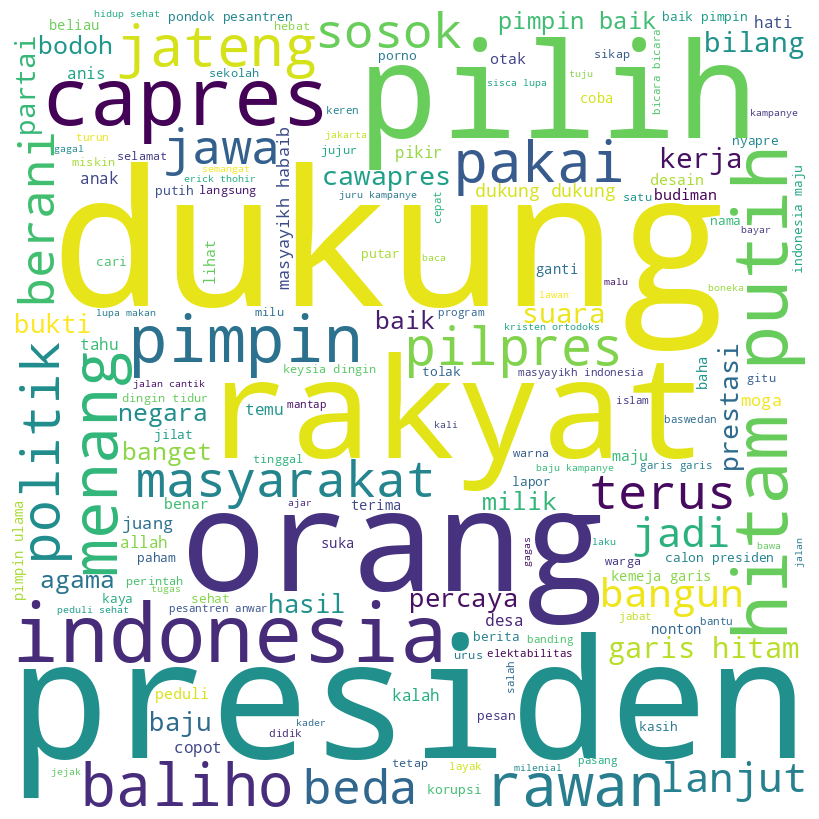

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(df['text_clean'])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Simpan WordCloud sebagai gambar (opsional)
wordcloud.to_file("wordcloud.png")

plt.show()


In [ ]:
# Assuming you have a DataFrame named df
df.to_csv('data_ganjar_600_nonNama.csv', index=False)

from google.colab import files

files.download('data_ganjar_600_nonNama.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>